### Let's help comander to defence our planet

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('invasion.csv')

In [3]:
df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [17]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [21]:
gamp = RandomForestClassifier()

In [22]:
params = {'n_estimators' : [i*10 for i in range(1,6)], 
          'max_depth' : [i for i in range(5,13,2)],
          'min_samples_leaf': [i for i in range(1,4)], 
          'min_samples_split': [i for i in range(2,5,2)] }

In [49]:
research = GridSearchCV(gamp, params, cv=4, n_jobs=-1, verbose=3)

In [24]:
research.fit(X, Y)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=3)

In [33]:
research.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [31]:
best_gamp = research.best_estimator_

#### So what about new invaders ?

In [25]:
X_test = pd.read_csv('operative_information.csv')

In [28]:
preds = best_gamp.predict(X_test)

In [38]:
pd.Series(preds).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

#### What measuments are most important for detection?

In [44]:
f_i = pd.DataFrame({'importance':best_gamp.feature_importances_, 'feature': X_test.columns })
f_i

,importance,feature
0,0.059203,g_reflection
1,0.051144,i_reflection
2,0.209123,speed
3,0.177904,brightness
4,0.000000,time_of_observance
5,0.502625,volume


<AxesSubplot:xlabel='feature'>

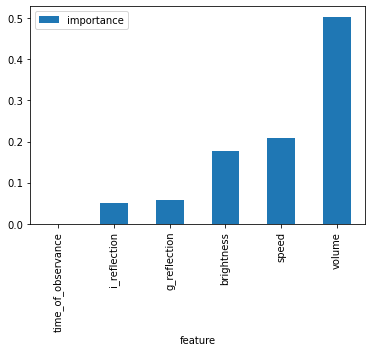

In [45]:
f_i.sort_values('importance').plot(kind = 'bar', x='feature')

### So, now we need to detect dangerous planet

In [46]:
data = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [47]:
data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [54]:
#research2 = GridSearchCV(gamp, params, cv=4, n_jobs=-1, verbose=3)
research2 =  RandomizedSearchCV(gamp, params, cv=4, n_jobs=-1, verbose=3)
research2.fit(data.drop(['dangerous'], axis=1) , data['dangerous'])

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 11],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   verbose=3)

In [55]:
best_rf = research2.best_estimator_

In [59]:
f_i2 = pd.DataFrame({'importance':best_rf.feature_importances_, 'feature': data.drop(['dangerous'], axis=1).columns })
f_i2.sort_values('importance', ascending=False )

,importance,feature
6,0.519790,nearby_system_has_planemo
5,0.453958,buggers_were_noticed
4,0.015047,black_hole_is_near
2,0.003131,peradventure_index
3,0.003129,dustiness
1,0.002688,phi
0,0.002258,r


#### So, as we can see - 'nearby_system_has_planemo' and 'buggers_were_noticed' most vluebale features. But we can do that more shotly:

<AxesSubplot:>

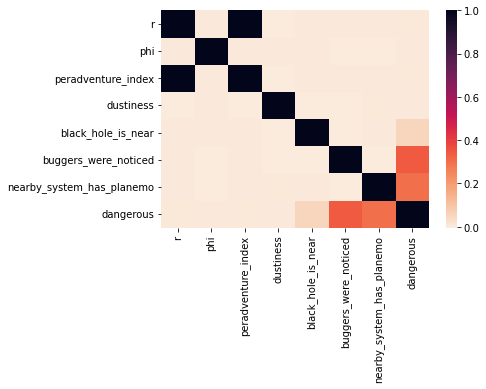

In [79]:
cr = data.corr() #.plot(x=['r', 'phi', 'peradventure_index', 'dustiness', 'black_hole_is_near', 'buggers_were_noticed', 'nearby_system_has_planemo'], y='dangerous', kind='hexbin')
from seaborn import heatmap
heatmap(cr, cmap="rocket_r"  )